In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## bar plot

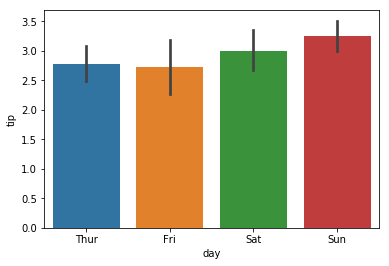

In [3]:
sns.barplot(x='day',y='tip',data=tips)

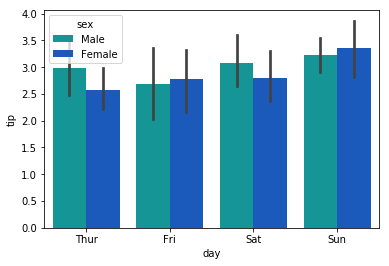

In [4]:
sns.barplot(x='day',y='tip',hue='sex',data=tips,palette='winter_r') #swap x,y for horzontal barplots

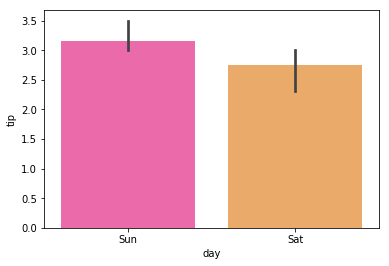

In [5]:
sns.barplot(x='day',y='tip',data=tips,palette='spring',order=['Sun','Sat'],estimator=np.median)

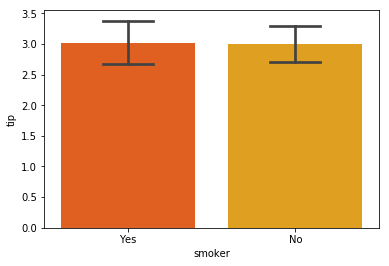

In [6]:
sns.barplot(x='smoker',y='tip',data=tips,ci=99,capsize=0.3,palette='autumn') #for error line on top ci-confidence interval

## Distplot

In [7]:
num = np.random.randn(150)

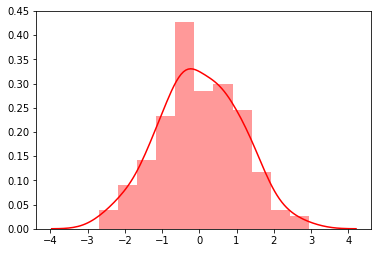

In [8]:
sns.distplot(num,color='red') #histogram and kde

In [9]:
lable_dist = pd.Series(num,name='Variable')

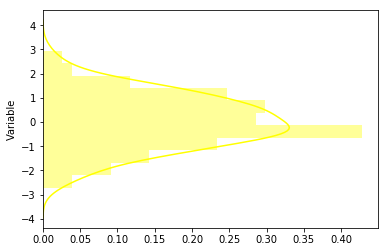

In [10]:
sns.distplot(lable_dist,vertical=True,color='yellow')

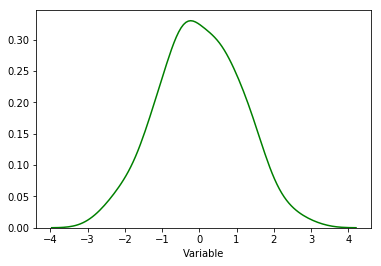

In [11]:
sns.distplot(lable_dist,hist=False,color='green') #only kde #rug = True instead of histogram

## Box Plot

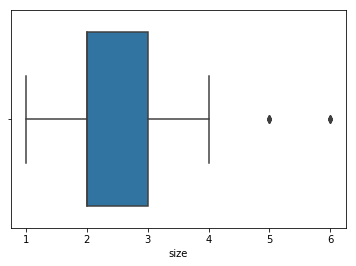

In [12]:
sns.boxplot(x=tips['size'])

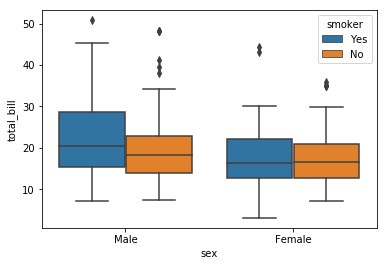

In [13]:
sns.boxplot(x='sex',y='total_bill',data=tips,hue='smoker')  #use order


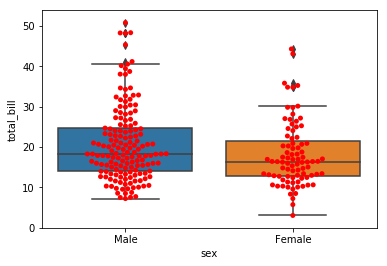

In [14]:
sns.boxplot(x='sex',y='total_bill',data=tips)  #use order
sns.swarmplot(x='sex',y='total_bill',data=tips,color='red') # combined

## Strip Plot

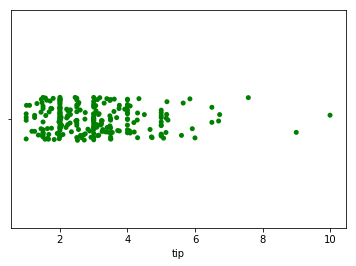

In [15]:
sns.stripplot(x=tips['tip'],color='green')

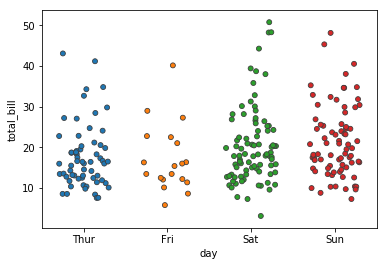

In [16]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=0.3,linewidth=0.8) #jitter = False for single line 
#swap x,y for horizontal #use hue

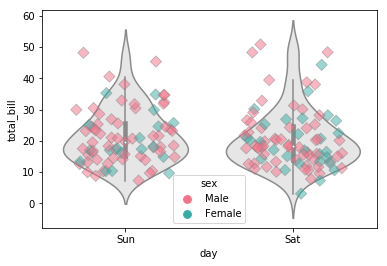

In [17]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=0.3,linewidth=0.8,hue='sex',order=['Sun','Sat'],palette='husl',
              marker='D',edgecolor='grey',alpha=0.5,
             size=8) 
#jitter = False for single line 
#swap x,y for horizontal #use hue #order can be used
#combine with other types of plots as well
sns.violinplot(x='day',y='total_bill',data=tips,order=['Sun','Sat'],alpha=0.2,color='0.9') #color 0-1 Dark to Light

## Pair Grid

In [18]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


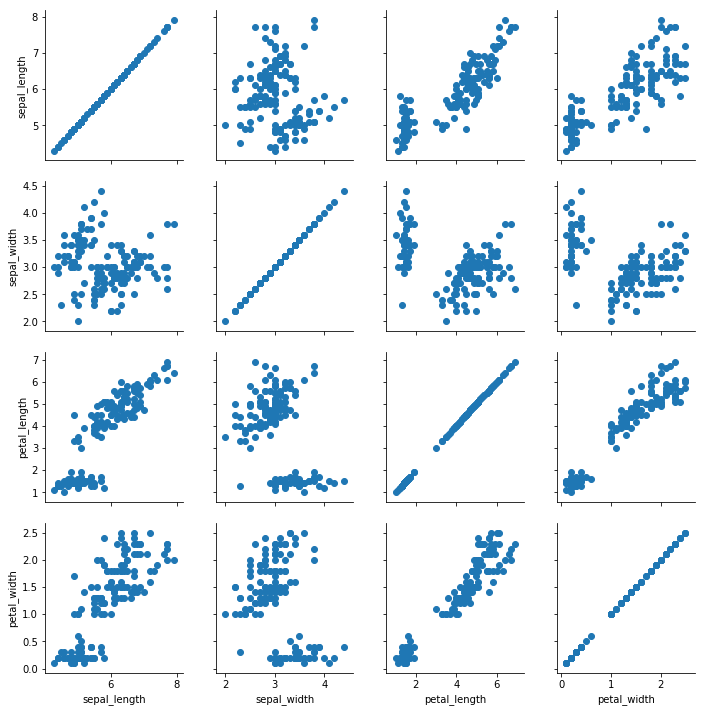

In [19]:
x = sns.PairGrid(iris)
x = x.map(plt.scatter) #can change the diagonal to plt.hist for histograms

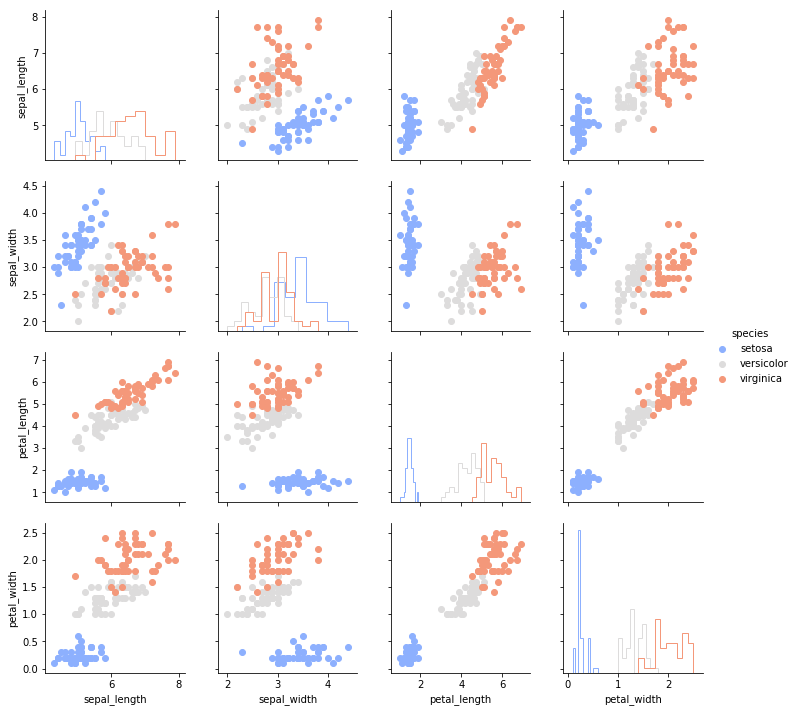

In [20]:
x = sns.PairGrid(iris,hue='species',palette='coolwarm') # use vars attribute to pass the list of variables needed only
# and x_vars , y_vars can also be used with required variables for pair plot
#hue_kws = {'marker': ['D','s','+']}--for marker in scatter


x = x.map_diag(plt.hist,histtype='step') #linewidth - to inc. the width of hist,histtype is optnal
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

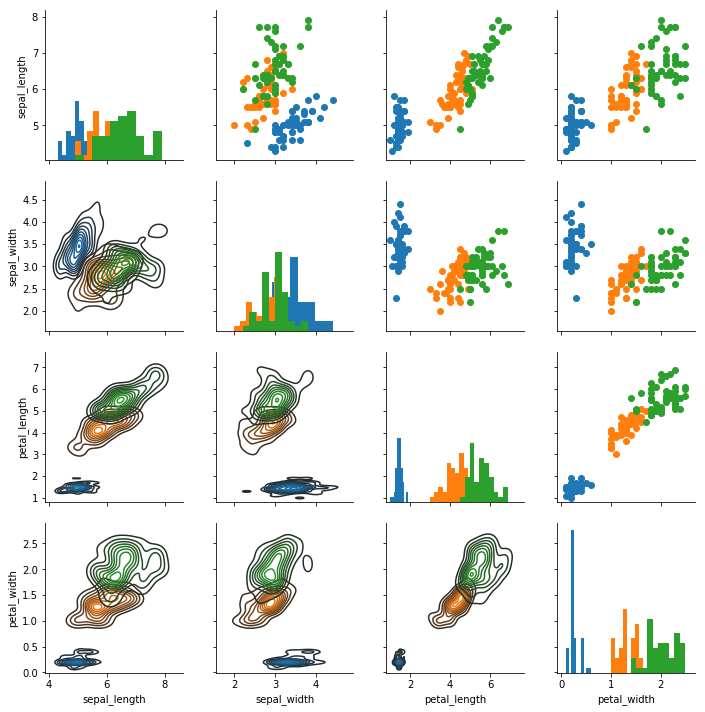

In [21]:
x = sns.PairGrid(iris,hue='species')
x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot)

## Violin Plots

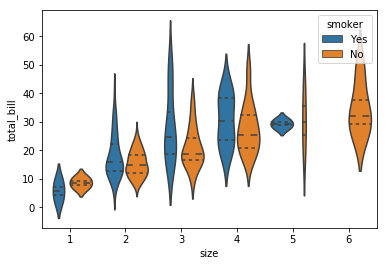

In [22]:
sns.violinplot(x='size',y='total_bill',hue='smoker',inner='quartile',data=tips)

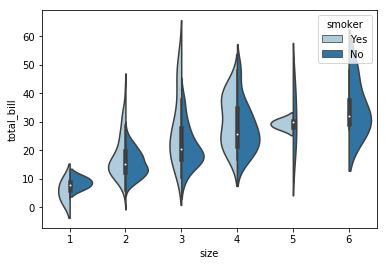

In [23]:
sns.violinplot(x='size',y='total_bill',hue='smoker',data=tips,split=True,palette='Paired') # comparison
#order attribute is accepted



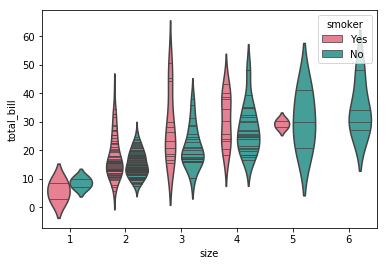

In [24]:
sns.violinplot(x='size',y='total_bill',hue='smoker',inner='stick',scale='count',data=tips,palette='husl')
#displaying each observation as line

## Cluster Map

	
Clustering is another way to think of new ideas. The word "cluster" means a group of similar things. Clustering means putting words into groups. Each group, or cluster, has a number of words that are related to each other. Clustering is similar to brainstorming. You try to think of many words and phrases. When you make a cluster map, you write the words and phrases in groups.



In [25]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
flights = flights.pivot('month','year','passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


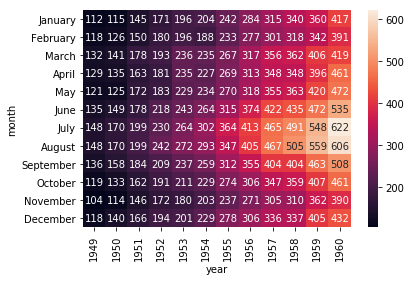

In [27]:
sns.heatmap(flights,annot=True,fmt='d')

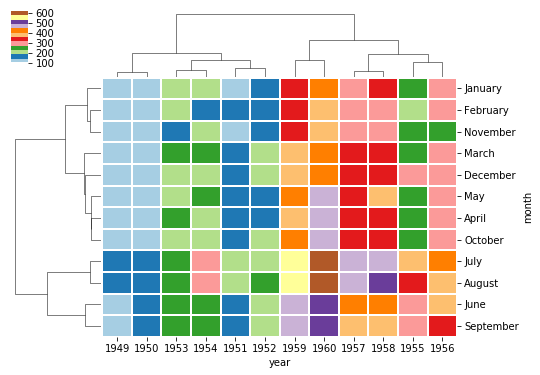

In [28]:
sns.clustermap(flights,col_cluster=True,row_cluster=True,cmap='Paired',linewidths=1,figsize=(8,6)) 
#col_cluster=True,row_cluster=True are optional

In [29]:
# standardize across cols(1) or rows(0)

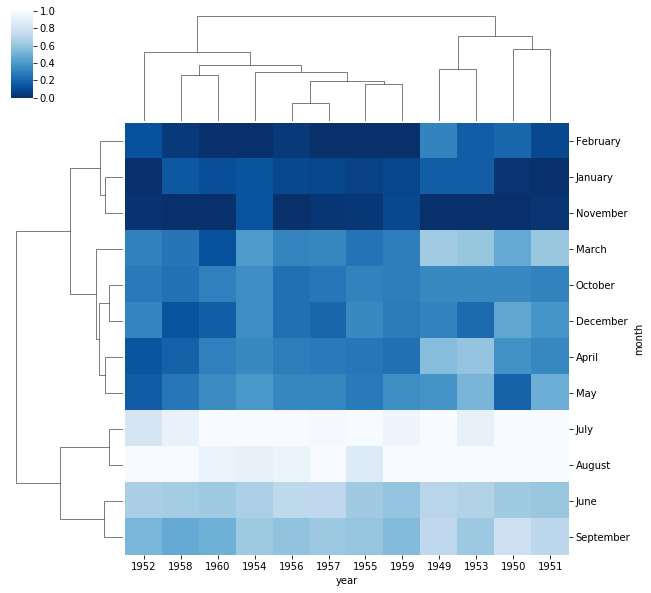

In [30]:
sns.clustermap(flights,standard_scale=1,cmap='Blues_r') # across the columns standardise

In [31]:
#normalize using z-score across rows(0),cols(1)
#sns.clustermap(flights,z_score=0) 

## Heat Maps

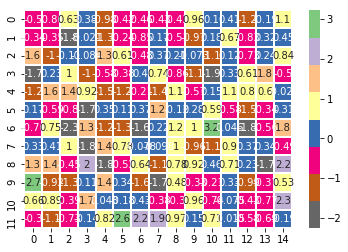

In [32]:
normal = np.random.randn(12,15)

sns.heatmap(normal,annot=True,linewidth=1,cmap='Accent_r')

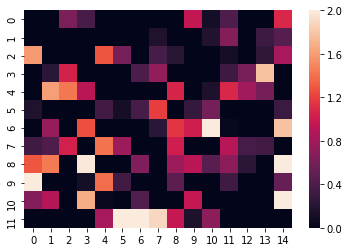

In [33]:
sns.heatmap(normal,vmin=0,vmax=2) # setting min max vals to display

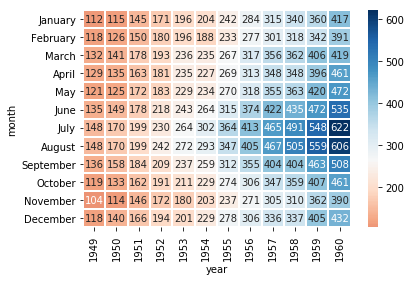

In [37]:
sns.heatmap(flights,annot=True,fmt='d',center=flights.loc['June',1954],cmap='RdBu',linewidth=1) 
# adding a center value [row,col]

## Facet Grid

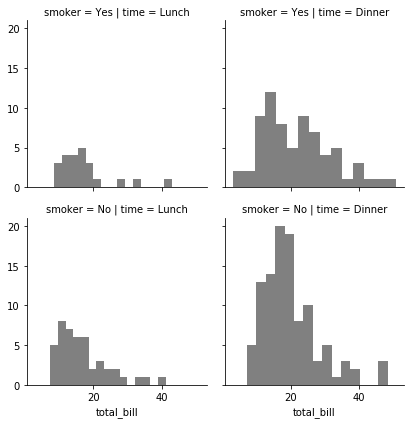

In [42]:
#initialising

x = sns.FacetGrid(tips,row='smoker',col='time') # x is mapping variable
x.map(plt.hist,'total_bill',color='grey',bins=15) # can passs bins

#can map it to any of the matplotlibs or seaborn's function

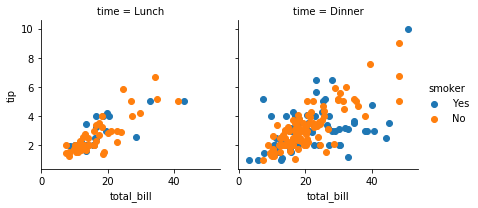

In [46]:
x = sns.FacetGrid(tips,col='time',hue='smoker')
x = (x.map(plt.scatter,'total_bill','tip').add_legend())


## KDE

In [47]:
### ##

## Joint Plots

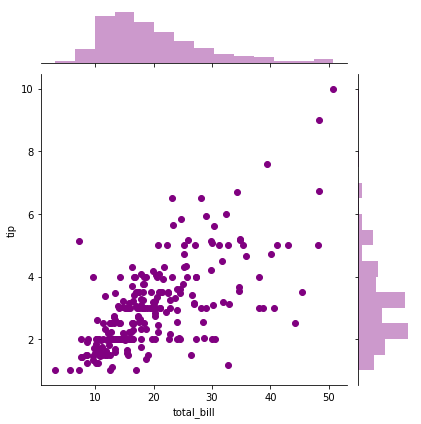

In [49]:
sns.jointplot(x='total_bill',y='tip',data=tips,color='purple') #set--> kind='reg' or 'hex' or 'kde'

## Reg Plot

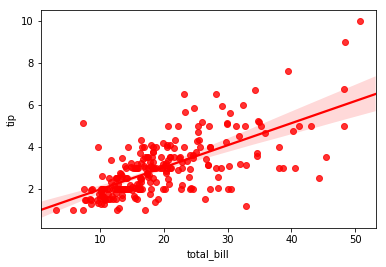

In [54]:
sns.regplot(x='total_bill',y='tip',data=tips,color='red');

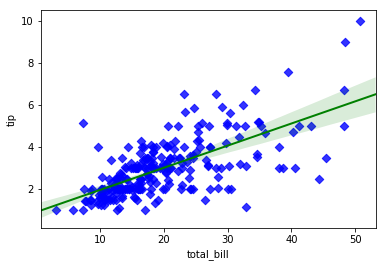

In [61]:
sns.regplot(x='total_bill',y='tip',data=tips,color='red',marker='D',
           scatter_kws={'color':'blue'},
           line_kws={'color':'green','linewidth':2});